In [ ]:
pip install numpy keras tensorflow matplotlib

Epoch 1/50
8/8 [==============================] - 1s 42ms/step - loss: 1.1814 - accuracy: 0.3417 - val_loss: 1.1314 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 1.1239 - accuracy: 0.3500 - val_loss: 1.0807 - val_accuracy: 0.3000
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 1.0761 - accuracy: 0.3333 - val_loss: 1.0350 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 1.0315 - accuracy: 0.3583 - val_loss: 0.9913 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.9897 - accuracy: 0.4750 - val_loss: 0.9428 - val_accuracy: 0.6000
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.9479 - accuracy: 0.6083 - val_loss: 0.8955 - val_accuracy: 0.7000
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.9054 - accuracy: 0.6833 - val_loss: 0.8523 - val_accuracy: 0.8000
Epoch 8/50
8/8 [==============

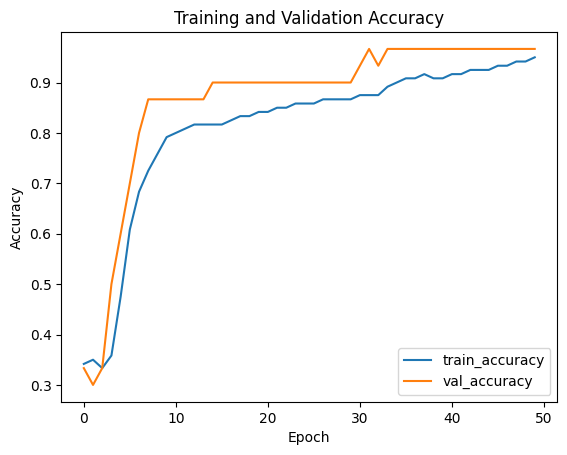

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load and preprocess the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X = StandardScaler().fit_transform(X)
y = to_categorical(y, num_classes=3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the FFN model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


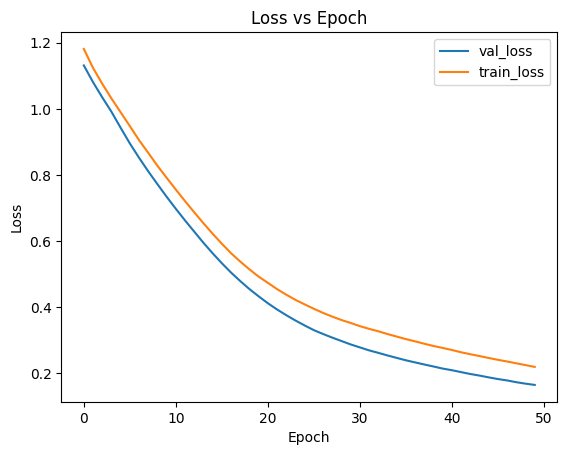

In [ ]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()